In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, inconsistent

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
# df = pd.read_csv('/content/sample_data/dataset_project_eHealth20232024.csv')
df = pd.read_csv('Project Data/dataset_project_eHealth20232024.csv')
random_state = 10
print("datashape: ", df.shape)
# print(df.info())

n_samples = df.shape[0]
# columns_to_drop = df.columns[5:42]  # Columns 5 to 41
columns_to_drop = df.columns[0:42]  # Columns 0 to 41


df_ccs = df.drop(columns=columns_to_drop)
df_ccs = df_ccs.dropna()
print(df_ccs.info())

datashape:  (160, 54)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 159
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ccs_1   148 non-null    float64
 1   ccs_2   148 non-null    int64  
 2   ccs_3   148 non-null    float64
 3   ccs_4   148 non-null    float64
 4   ccs_5   148 non-null    float64
 5   ccs_6   148 non-null    float64
 6   ccs_7   148 non-null    int64  
 7   ccs_8   148 non-null    int64  
 8   ccs_9   148 non-null    int64  
 9   ccs_10  148 non-null    int64  
 10  ccs_11  148 non-null    int64  
 11  ccs_12  148 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 15.0 KB
None


In [3]:
data_ccs = pd.DataFrame()     
data_ccs['Trend Skepticism'] = df_ccs[['ccs_1', 'ccs_7', 'ccs_11']].mean(axis=1)
data_ccs['Attribution Skepticism'] = df_ccs[['ccs_2', 'ccs_6', 'ccs_9']].mean(axis=1)
data_ccs['Impact Skepticism'] = df_ccs[['ccs_3', 'ccs_5', 'ccs_12']].mean(axis=1)
data_ccs['Response Skepticism'] = df_ccs[['ccs_4', 'ccs_8', 'ccs_10']].mean(axis=1)
print (data_ccs)

     Trend Skepticism  Attribution Skepticism  Impact Skepticism  \
0            1.000000                3.000000           3.333333   
1            1.333333                2.000000           5.000000   
2            5.000000                1.666667           5.000000   
3            2.000000                2.000000           3.333333   
4            4.000000                0.333333           3.333333   
..                ...                     ...                ...   
155          3.000000                3.000000           3.000000   
156          0.333333                1.333333           4.333333   
157          1.000000                2.000000           2.666667   
158          3.333333                1.666667           0.666667   
159          3.666667                5.000000           1.000000   

     Response Skepticism  
0               1.666667  
1               2.333333  
2               2.333333  
3               1.666667  
4               2.333333  
..                   

In [4]:
# define the color palettes
data_colors = ['#a6cdf6','#b2d0b7','#f98ea1', '#ffc0cb', '#800080', '#FFFF00']
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
centroid_colors = ['#1b80e8','#599062','#e20c32','#FF1493', '#800080', '#FFD700' ]
centroid_cmap = ListedColormap(centroid_colors)

In [5]:
# You create a MinMaxScaler object called min_max_scaler. This object will be used to perform the min-max scaling.
# You apply the fit_transform method of the MinMaxScaler to scale the data in the DataFrame df and store the scaled data in np_df.

# EXTRA: The inverse_transform method is used to revert the scaling
# transformation performed by the MinMaxScaler back to the original scale.
# In your code, you are trying to reverse the scaling and obtain the original data.


min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data_ccs)
X_nrm = pd.DataFrame(normalized_data, columns=data_ccs.columns)
print(X_nrm)

std_scaler = StandardScaler()
standardized_data = std_scaler.fit_transform(data_ccs)
X_std = pd.DataFrame(standardized_data, columns=data_ccs.columns)
print(X_std)


     Trend Skepticism  Attribution Skepticism  Impact Skepticism  \
0            0.166667                0.470588           0.666667   
1            0.222222                0.294118           1.000000   
2            0.833333                0.235294           1.000000   
3            0.333333                0.294118           0.666667   
4            0.666667                0.000000           0.666667   
..                ...                     ...                ...   
143          0.500000                0.470588           0.600000   
144          0.055556                0.176471           0.866667   
145          0.166667                0.294118           0.533333   
146          0.555556                0.235294           0.133333   
147          0.611111                0.823529           0.200000   

     Response Skepticism  
0               0.000000  
1               0.666667  
2               0.666667  
3               0.000000  
4               0.666667  
..                   

## K-Means

#### Normalized Data

Text(0.5, 1.0, 'K-means')

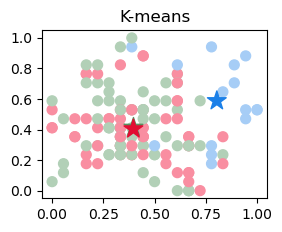

In [6]:
model_nrm = KMeans(n_clusters=3, n_init='auto').fit(X_nrm)
y_pred_nrm = model_nrm.predict(X_nrm)
plt.subplot(221)
plt.scatter(X_nrm['Trend Skepticism'], X_nrm['Attribution Skepticism'], s=50, c=[data_colors[y] for y in y_pred_nrm])
plt.scatter(model_nrm.cluster_centers_[:,0], model_nrm.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model_nrm.cluster_centers_)])
plt.title("K-means")

#### Standardized Data

Text(0.5, 1.0, 'K-means')

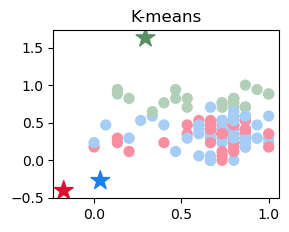

In [7]:
model_std = KMeans(n_clusters=3, n_init='auto').fit(X_std)
y_pred_std = model_std.predict(X_std)
plt.subplot(221)
plt.scatter(X_nrm['Impact Skepticism'], X_nrm['Attribution Skepticism'], s=50, c=[data_colors[y] for y in y_pred_std])
plt.scatter(model_std.cluster_centers_[:,0], model_std.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model_std.cluster_centers_)])
plt.title("K-means")

#### Knee-elbow analysis

In [8]:
def KneeElbowAnalysis(x,max_k=20):
    k_values = range(1,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state, n_init='auto').fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.xticks(k_values)
    plt.plot(k_values, wcss, 'o-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'o-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering');

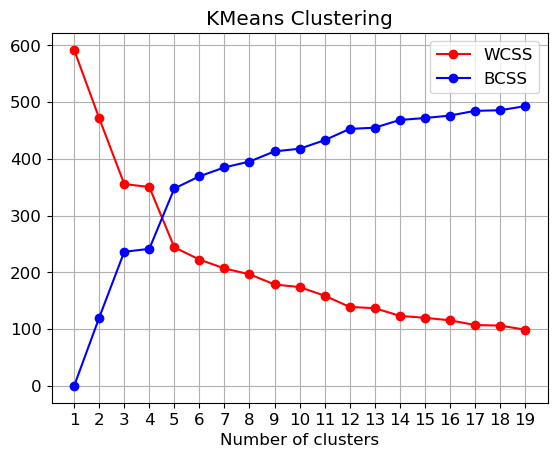

In [9]:
KneeElbowAnalysis(X_std)

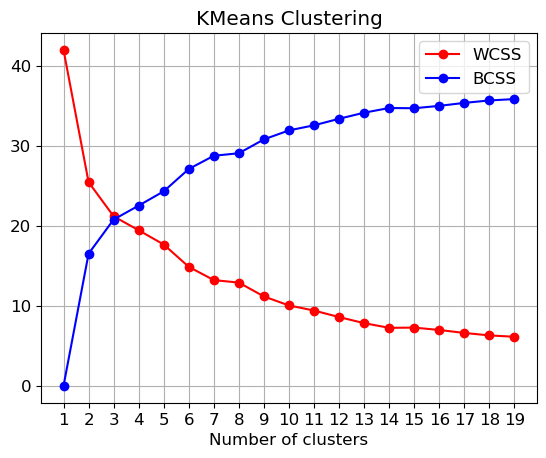

In [10]:
KneeElbowAnalysis(X_nrm)

## DBScan

In [11]:
db = DBSCAN(eps=0.86, min_samples=10).fit(X_std.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
noisy_points = db.labels_==-1
cluster_points = ~noisy_points

print("Number of clusters = %d"%n_clusters_)
print("Number of cluster points = %d"%sum(cluster_points))
print("Number of noisy points = %d"%sum(noisy_points))

[ 0 -1 -1  0 -1 -1  0 -1  0 -1  0  1 -1 -1  3 -1 -1 -1 -1  3  3  0  0 -1
 -1  1 -1  0 -1 -1  1 -1  0  0 -1  0 -1  0  0 -1  0 -1 -1 -1  3 -1 -1 -1
 -1  3 -1 -1  2 -1  2 -1 -1  0  2  0  2  3 -1 -1  1 -1 -1 -1  2 -1  0 -1
  2 -1 -1  0  2 -1  1  1 -1 -1  3 -1 -1  3  3 -1 -1 -1 -1  0 -1 -1  0  1
 -1 -1  3 -1 -1 -1  3  3  3 -1  0 -1  2 -1  0 -1  2 -1 -1  0 -1 -1 -1 -1
 -1 -1  1 -1  2  2  2  1  3  2 -1 -1 -1  0  3 -1 -1 -1 -1  1  0  2 -1 -1
 -1 -1 -1 -1]
Number of clusters = 4
Number of cluster points = 64
Number of noisy points = 84


## Hierarchical Clustering

In [12]:
def plot_dendrogram():
    plt.figure(figsize=(25, 10))
    font = {'family' : 'sans', 'size'   : 18}
    plt.rc('font', **font)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    dendrogram(Z, 
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=8.,  # font size for the x axis labels
    )
    plt.xticks([])
    plt.show()

In [13]:
def get_inconsistency(d):
    print("\nInconsistency analysis for d = ", d)
    inconsistency = inconsistent(Z, d)
    for i in reversed(range(1,15)):
        print("from %d to %d => Inconsistency %.3f"%(i,i+1,inconsistency[-i][3]))

#### Normalized Data

Z has 147 rows


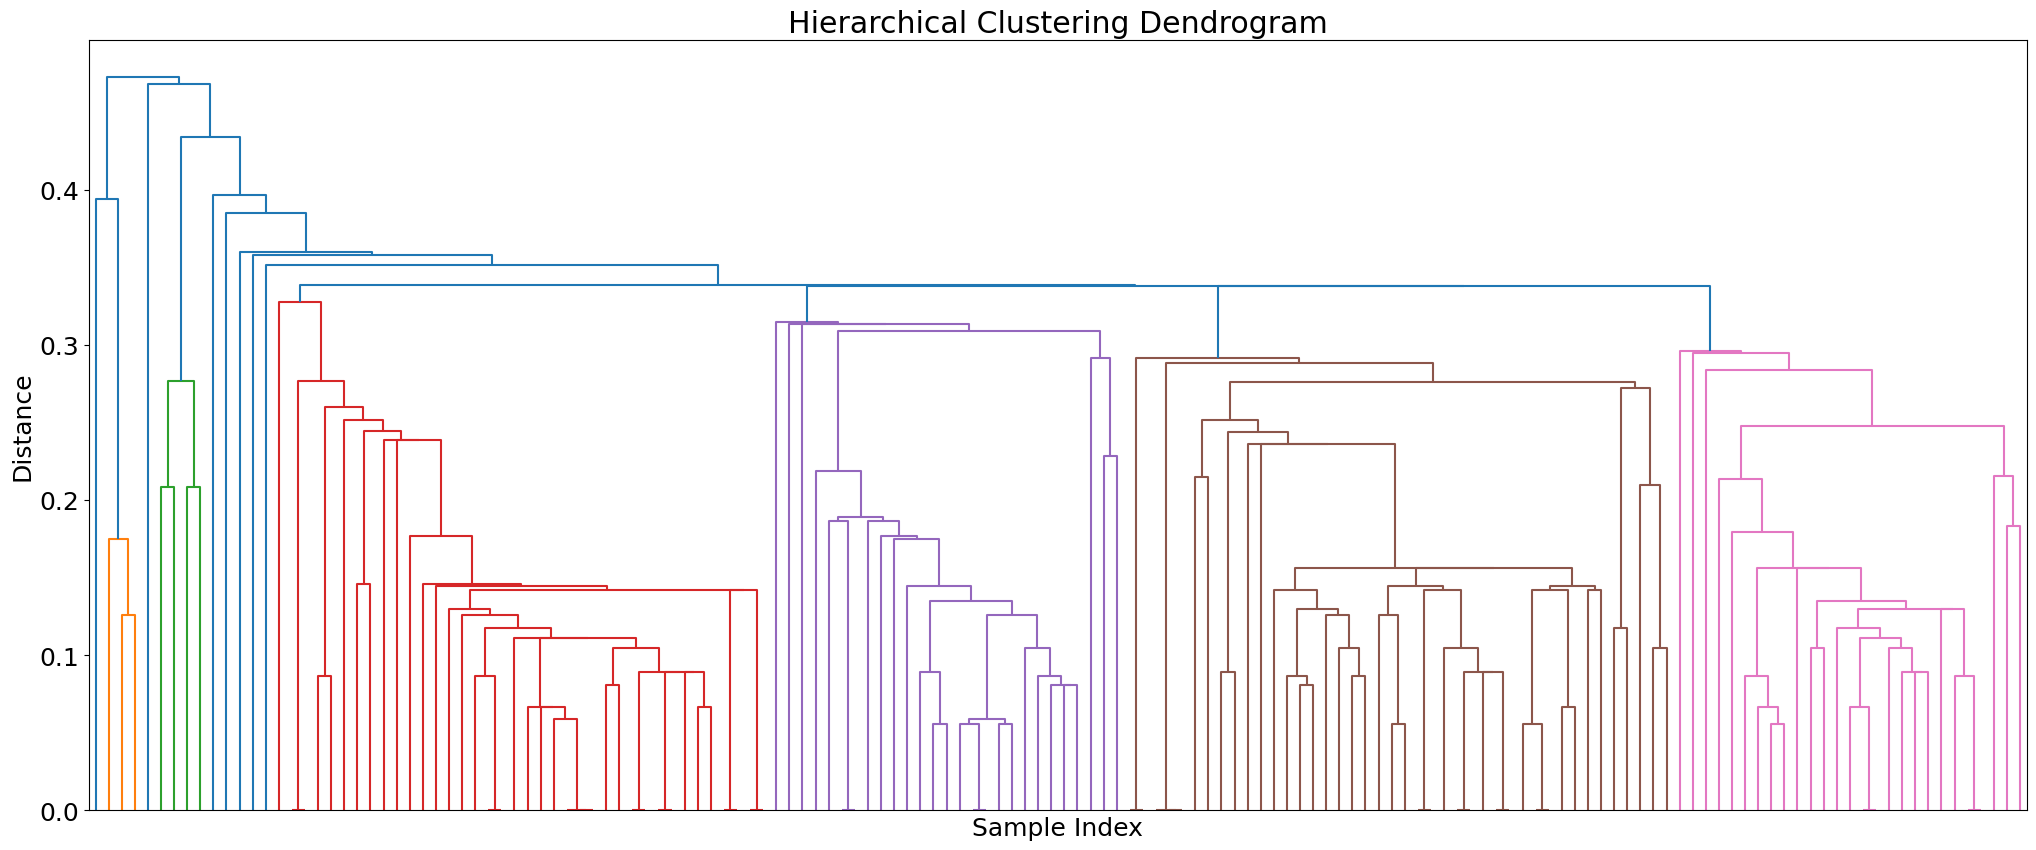


Inconsistency analysis for d =  3
from 14 to 15 => Inconsistency 1.141
from 13 to 14 => Inconsistency 0.758
from 12 to 13 => Inconsistency 0.694
from 11 to 12 => Inconsistency 1.144
from 10 to 11 => Inconsistency 0.675
from 9 to 10 => Inconsistency 1.288
from 8 to 9 => Inconsistency 0.873
from 7 to 8 => Inconsistency 0.798
from 6 to 7 => Inconsistency 1.152
from 5 to 6 => Inconsistency 1.137
from 4 to 5 => Inconsistency 0.854
from 3 to 4 => Inconsistency 1.159
from 2 to 3 => Inconsistency 0.890
from 1 to 2 => Inconsistency 0.679

Inconsistency analysis for d =  10
from 14 to 15 => Inconsistency 1.100
from 13 to 14 => Inconsistency 1.485
from 12 to 13 => Inconsistency 1.654
from 11 to 12 => Inconsistency 1.403
from 10 to 11 => Inconsistency 1.334
from 9 to 10 => Inconsistency 1.370
from 8 to 9 => Inconsistency 1.235
from 7 to 8 => Inconsistency 1.029
from 6 to 7 => Inconsistency 1.067
from 5 to 6 => Inconsistency 1.137
from 4 to 5 => Inconsistency 1.050
from 3 to 4 => Inconsistency 1.4

In [23]:
Z = linkage(X_nrm, 'single')
print('Z has %d rows'%(len(Z)))
plot_dendrogram()
get_inconsistency(3)
get_inconsistency(10)

#### Standardized Data

Z has 147 rows


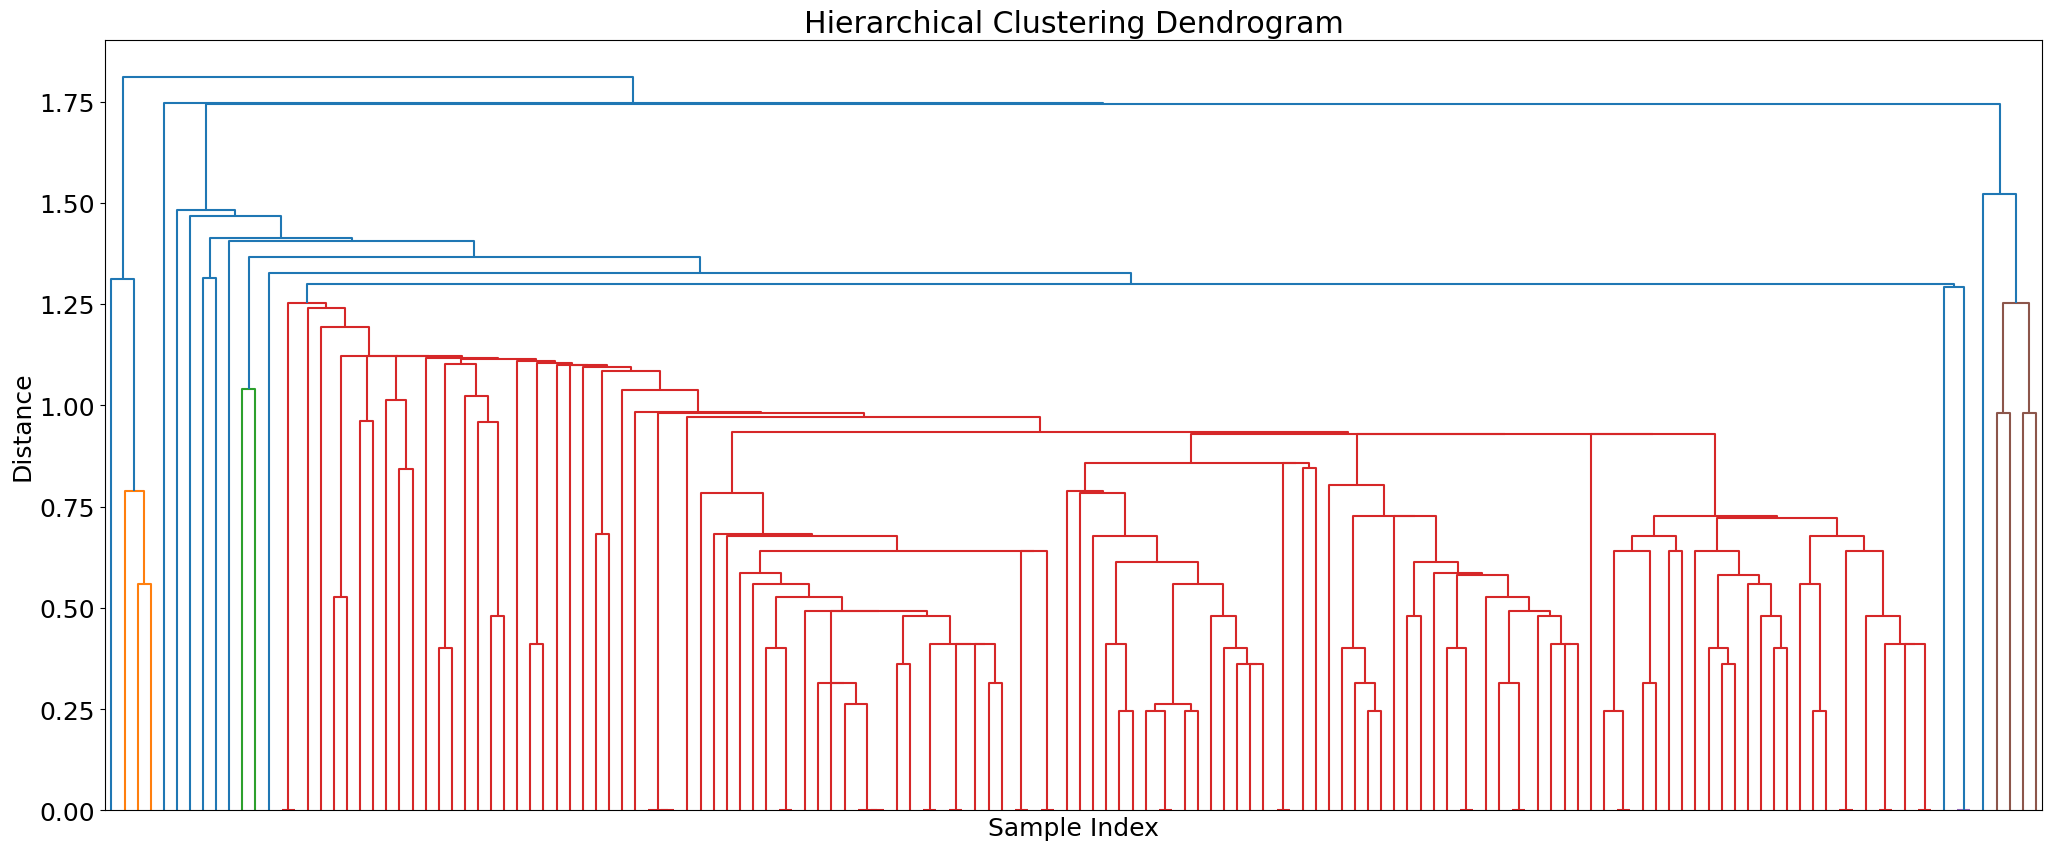


Inconsistency analysis for d =  3
from 14 to 15 => Inconsistency 0.707
from 13 to 14 => Inconsistency 0.687
from 12 to 13 => Inconsistency 1.103
from 11 to 12 => Inconsistency 0.000
from 10 to 11 => Inconsistency 1.107
from 9 to 10 => Inconsistency 0.739
from 8 to 9 => Inconsistency 0.727
from 7 to 8 => Inconsistency 0.834
from 6 to 7 => Inconsistency 1.059
from 5 to 6 => Inconsistency 0.773
from 4 to 5 => Inconsistency 1.305
from 3 to 4 => Inconsistency 1.429
from 2 to 3 => Inconsistency 0.874
from 1 to 2 => Inconsistency 0.760

Inconsistency analysis for d =  10
from 14 to 15 => Inconsistency 0.707
from 13 to 14 => Inconsistency 0.835
from 12 to 13 => Inconsistency 1.103
from 11 to 12 => Inconsistency 0.000
from 10 to 11 => Inconsistency 0.850
from 9 to 10 => Inconsistency 0.869
from 8 to 9 => Inconsistency 0.867
from 7 to 8 => Inconsistency 0.768
from 6 to 7 => Inconsistency 0.753
from 5 to 6 => Inconsistency 0.720
from 4 to 5 => Inconsistency 1.305
from 3 to 4 => Inconsistency 1.2

In [22]:
Z = linkage(X_std, 'single')
print('Z has %d rows'%(len(Z)))
plot_dendrogram()
get_inconsistency(3)
get_inconsistency(10)

# Silhouette visualization

In [16]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from kmodes.kmodes import KModes

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import numpy as np

print(__doc__)
range_n_clusters = [2, 3, 4, 5, 6]

Automatically created module for IPython interactive environment


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.3761419678949281


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.25905271037747457


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.27613690901628535


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.2903625465825757


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.297844848612245


/Users/caterinagiardi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.27580488988866547


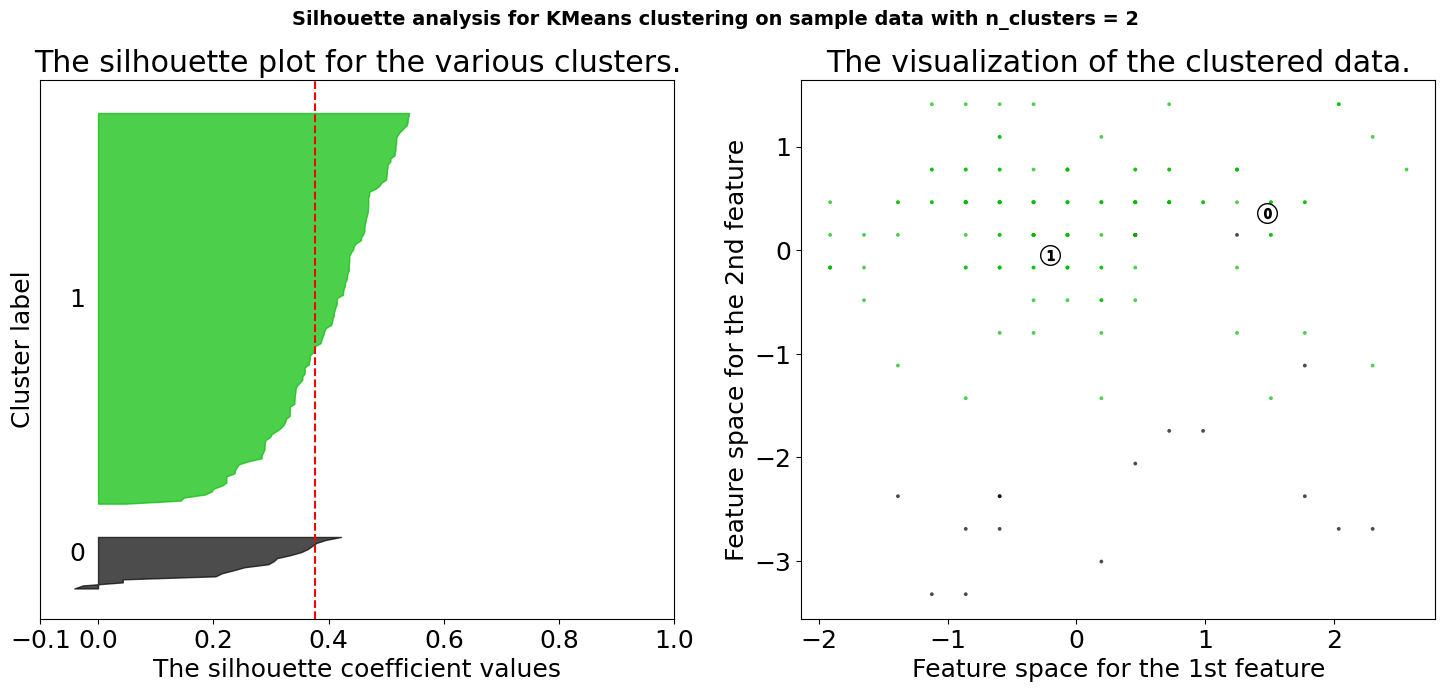

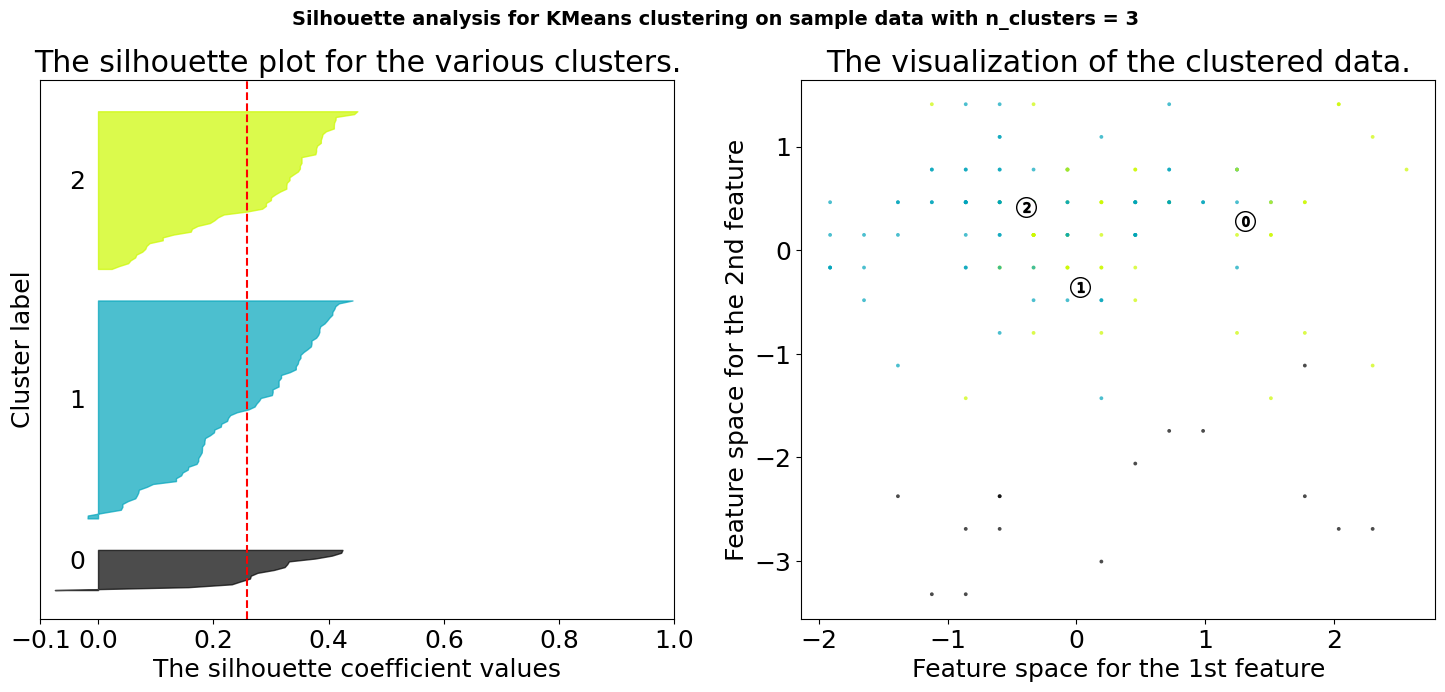

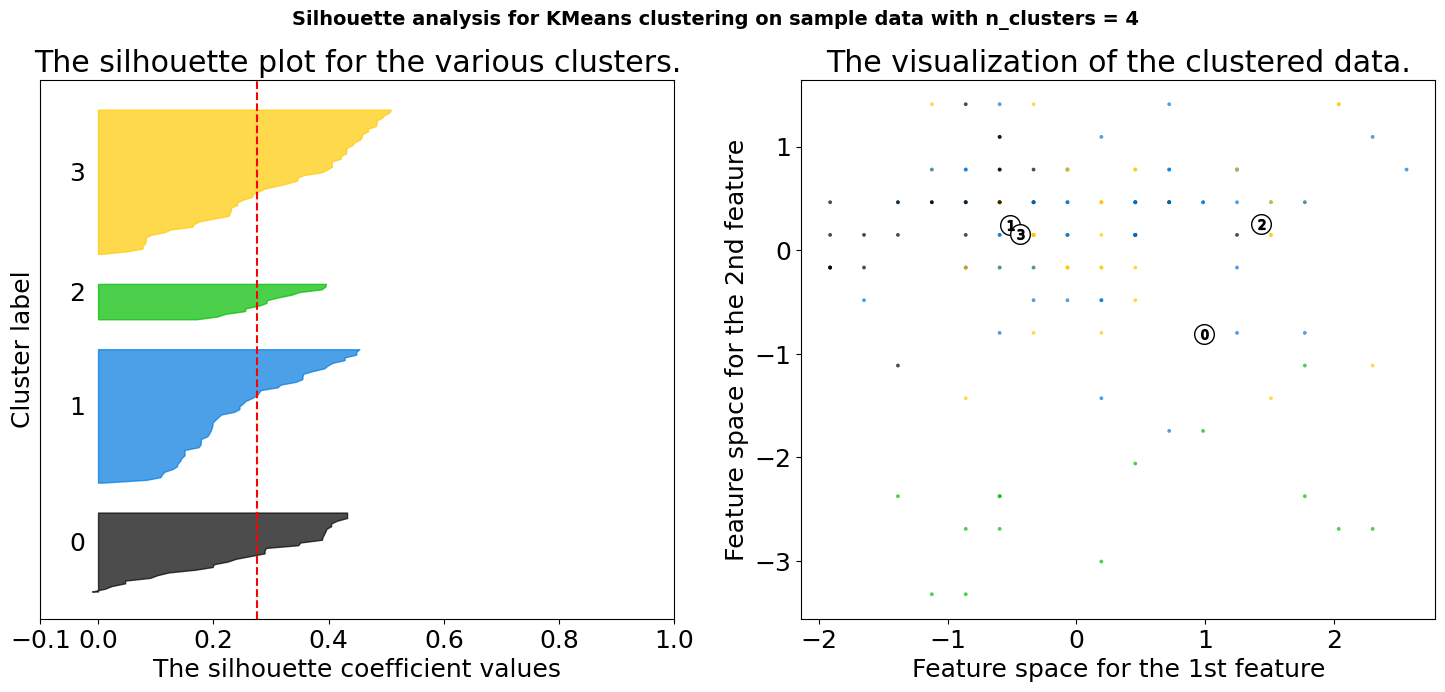

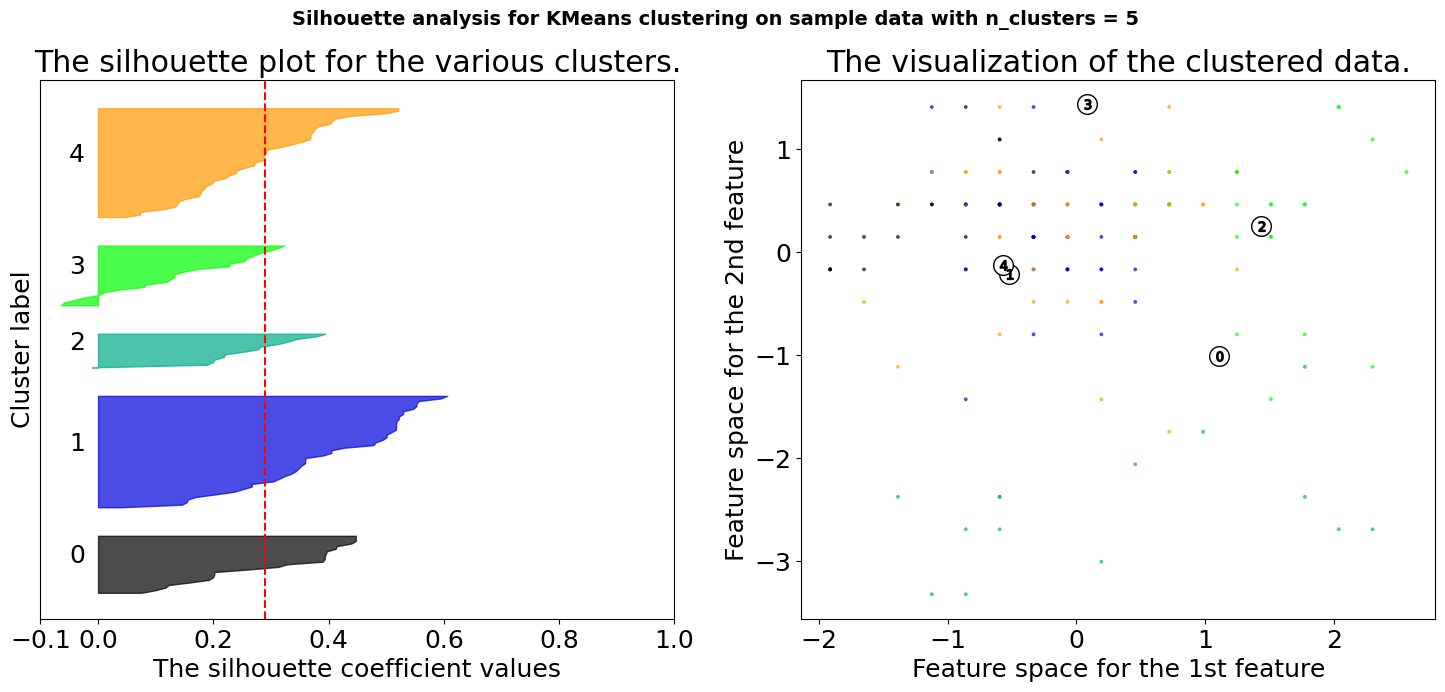

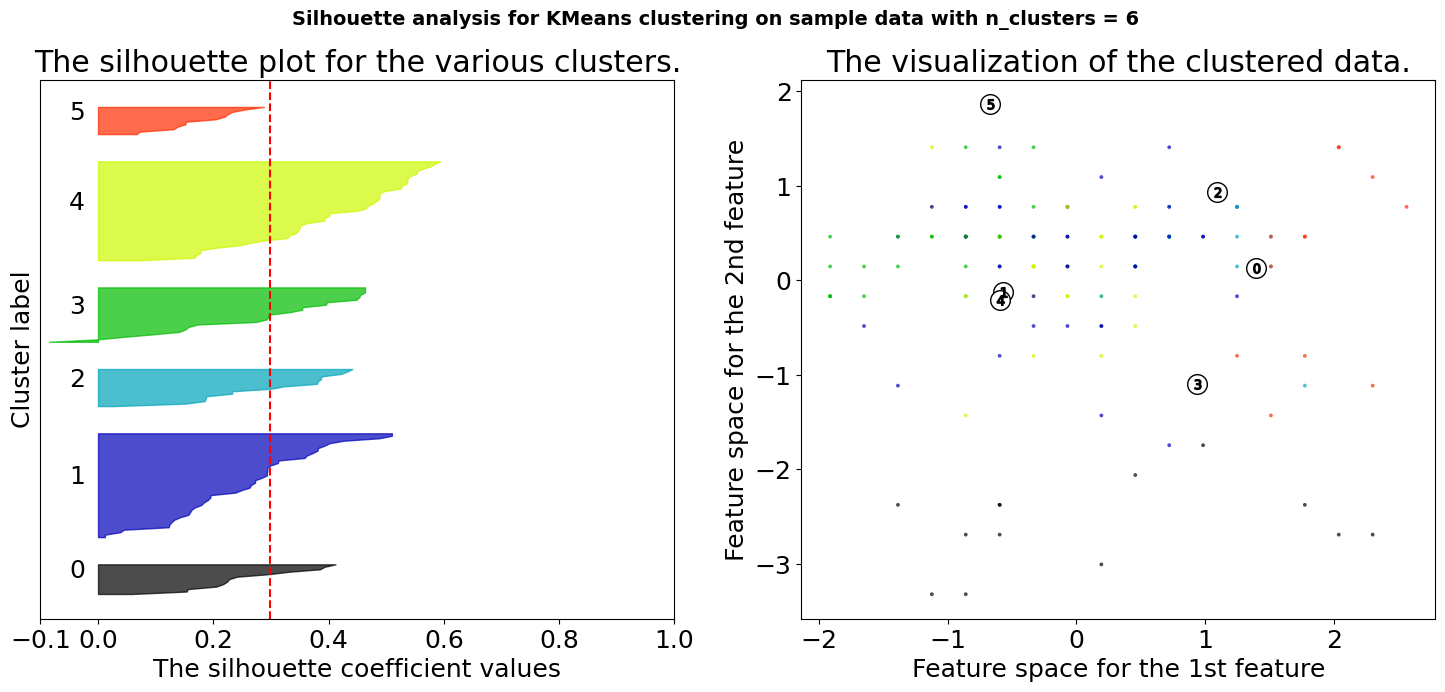

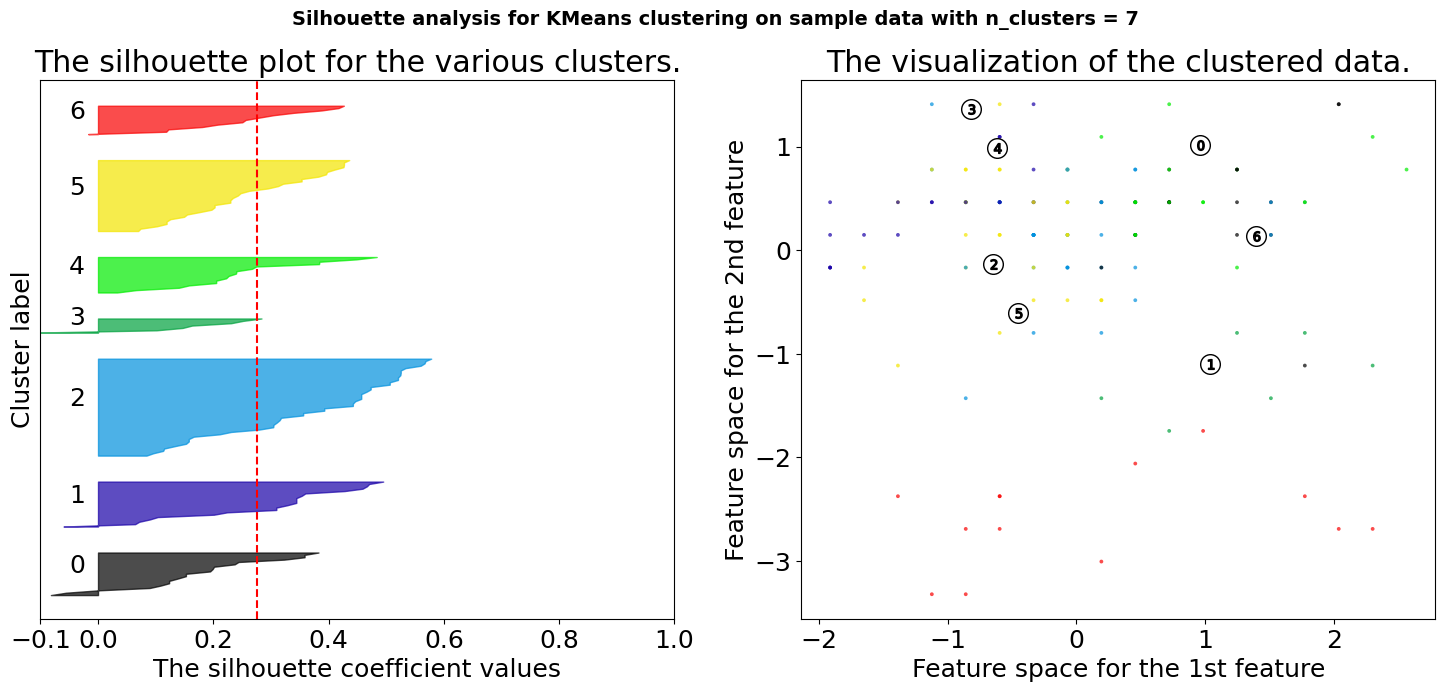

In [17]:
X = X_std

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 1], X.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Trial

In [18]:
def Silhouette_t(X, clusterer):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.

        # clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        # clusterer = KModes(n_clusters=n_clusters, random_state=10)

        cluster_labels = clusterer.fit_predict(X)
        print(cluster_labels.shape)


        """
       
        cluster_modes = []

        for i in range(clusterer.n_clusters):
            cluster_data = X[cluster_labels == i]  # Filter data points belonging to the cluster
            print("cluster nr: ", i, "\n Shape:", cluster_data.shape)
            mode = []
            for feature_index in range(X.shape[1]):
                unique, counts = np.unique(cluster_data.iloc[:,feature_index], return_counts=True)
                mode_value = unique[np.argmax(counts)]
                mode.append(mode_value)
            cluster_modes.append(mode)
            print("cluster_modes: ", len(cluster_modes[-1]))


        """



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X['ccs_1'], X['ccs_2'], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')



        # Labeling the clusters
        # centers = clusterer.cluster_centers_
        centers = cluster_modes



        # Draw white circles at cluster centers
        ax2.scatter(centers[:][0], centers[:][1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

#### Final

In [19]:
def Silhouette(X, algo):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        if (algo == "kmeans"):
            clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        if (algo == "hierarchical"):
            Z = linkage(X, 'single')
            dendrogram(linkage_matrix, orientation='top')
        
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

NameError: name 'linkage_matrix' is not defined

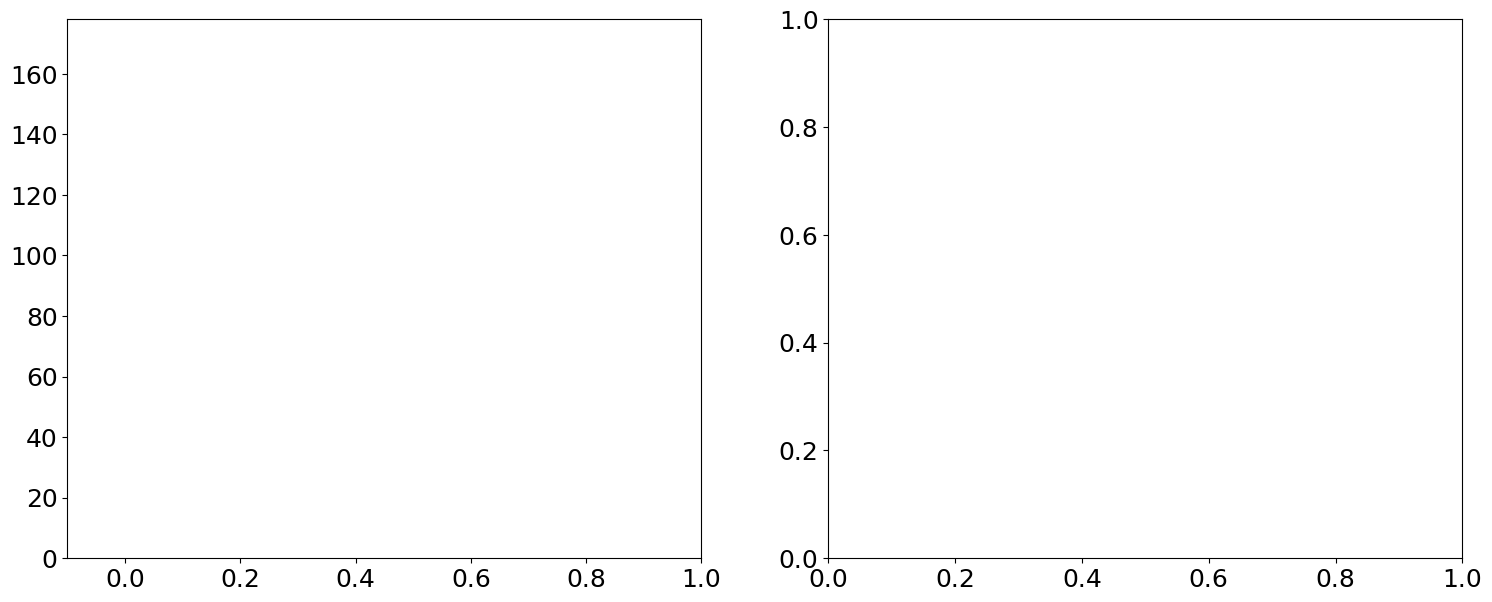

In [20]:
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
# Silhouette(X_std, "kmeans")
# Silhouette(X_nrm, "kmeans")
Silhouette(X_std, "hierarchical")
Silhouette(X_nrm, "hierarchical")

In [ ]:
""" 
single_linkage = cluster.AgglomerativeClustering(
            linkage="single", 
            n_clusters=params['n_clusters'])
        complete_linkage = cluster.AgglomerativeClustering(
            linkage="complete", 
            n_clusters=params['n_clusters'])
        average_linkage = cluster.AgglomerativeClustering(
            linkage="average", 
            n_clusters=params['n_clusters'])        
    kmeans = cluster.KMeans(n_clusters=2, init='random', n_init='auto')
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    dbscan = cluster.DBSCAN(eps=params['eps'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
"""